In [1]:
# Sử dụng các thư viện sau để train mô hình
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Data/

/content/drive/MyDrive/Colab Notebooks/Data


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tải bộ dữ liệu training set
training_set=train_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/Data/Tien_Giang/Train",target_size=(150,150), batch_size=32, class_mode='categorical')

Found 977 images belonging to 11 classes.


In [ ]:
# Tải bộ dữ liệu validation
validation=train_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/Data/Tien_Giang/Validation",target_size=(150,150), batch_size=32, class_mode='categorical')

Found 115 images belonging to 11 classes.


In [ ]:
# Xem các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '200d': 4,
 '20K': 5,
 '2K': 6,
 '500K': 7,
 '500d': 8,
 '50K': 9,
 '5K': 10}

In [ ]:
# Xem các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '200d': 4,
 '20K': 5,
 '2K': 6,
 '500K': 7,
 '500d': 8,
 '50K': 9,
 '5K': 10}

In [ ]:
# Tạo mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch mô hình
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#Train mô hình với 500 lần học (epochs), mỗi lần học 50 dữ liệu (batch_size), khi sai số không thay đổi trong 30 lần học thì sẽ␣ dừng việc train
history=model.fit(training_set,epochs=500,batch_size=50,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/500
31/31 [==============================] - 305s 9s/step - loss: 3.6425 - accuracy: 0.0901 - val_loss: 2.3966 - val_accuracy: 0.0957
Epoch 2/500
31/31 [==============================] - 25s 793ms/step - loss: 2.3924 - accuracy: 0.1320 - val_loss: 2.3930 - val_accuracy: 0.0957
Epoch 3/500
31/31 [==============================] - 24s 781ms/step - loss: 2.3938 - accuracy: 0.1064 - val_loss: 2.4011 - val_accuracy: 0.0870
Epoch 4/500
31/31 [==============================] - 25s 788ms/step - loss: 2.3637 - accuracy: 0.1546 - val_loss: 2.3695 - val_accuracy: 0.0783
Epoch 5/500
31/31 [==============================] - 24s 775ms/step - loss: 2.3126 - accuracy: 0.1341 - val_loss: 2.3604 - val_accuracy: 0.1217
Epoch 6/500
31/31 [==============================] - 24s 772ms/step - loss: 2.2015 - accuracy: 0.1812 - val_loss: 2.3752 - val_accuracy: 0.1130
Epoch 7/500
31/31 [==============================] - 24s 772ms/step - loss: 2.1393 - accuracy: 0.2149 - val_loss: 2.2438 - val_accuracy: 0

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.2764296531677246
Train Accuracy 0.9068577289581299


<function matplotlib.pyplot.show>

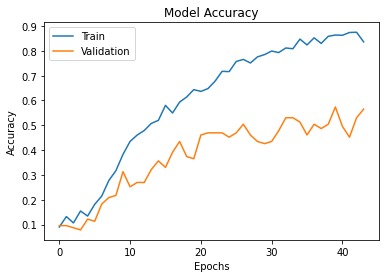

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("MONEY.h5")

In [3]:
# Tải mô hình 
model_CNN=load_model('MONEY.h5')

2K


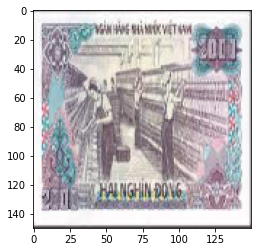

1K


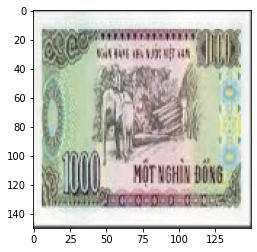

1K


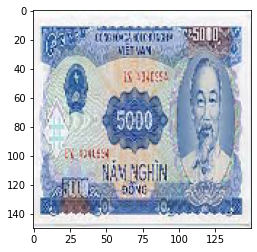

1K


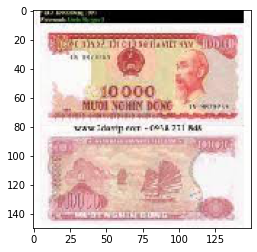

1K


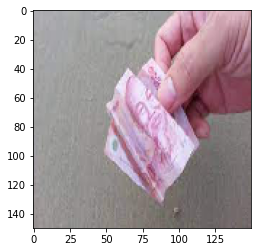

100K


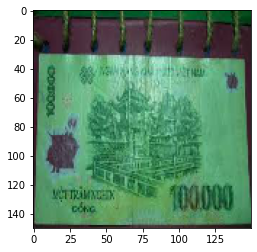

200K


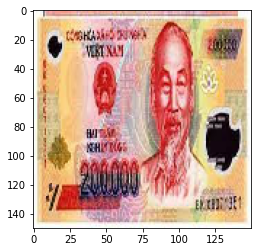

500K


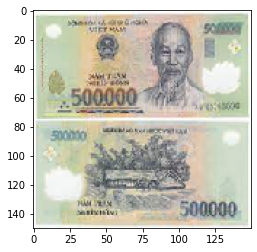

In [8]:
import os
# Kiểm tra hình của từng bạn với bộ dữ liệu test_set
test="/content/drive/MyDrive/Colab Notebooks/Data/TEST_DATA/Test_Moneys/Money_8"
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='100K'
  if round(result[0][1])==1:
    prediction='10K'
  if round(result[0][2])==1:
    prediction='1K'
  if round(result[0][3])==1:
    prediction='200K'
  if round(result[0][4])==1:
    prediction='200'
  if round(result[0][5])==1:
    prediction='20K'
  if round(result[0][6])==1:
    prediction='2K'
  if round(result[0][7])==1:
    prediction='500K'
  if round(result[0][8])==1:
    prediction='500K'
  if round(result[0][9])==1:
    prediction='500K'
  if round(result[0][9])==1:
    prediction='5K'
  print(prediction)
  plt.show()

In [9]:
 # Chuyển sang pdf
from google.colab import drive
drive.mount('/content/drive')
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('MONEY.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommende

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'